<center><h1>Yazılım Geliştirme Veriseti Analizi Projesi</h1></center>
<h3>Bilgi</h3>
<ul>
    <li><b>Dataset:</b> New York Eyaleti Likör Yönetmeliği: Alkollü Mekanların Ruhsat Kodları</li>
    <li>
        <b>Dataset URL:</b> <a href="https://www.kaggle.com/new-york-state/nys-nys-liquor-authority-new-applications-received">Kaggle</a></li> 
</ul> 
<br>
<h3>Projenin Adimlari</h3>
<ol>
    <li>Gerekli Araçların Projeye Dahil Edilmesi ve Verimizi Okuma</li>
    <li>Verimize Bakış</li>
    <li>Görselleştirme</li>
    <li>Verimizin Temiz ve İşlenebilir Hale Getirilmesi</li>
</ol>

<hr>

<h3><u>Veri Analizimide Kullanacağımız Kütüphanelerin ve Verimizin Import Edilmesi</u></h3>

In [21]:
import numpy as np # matris formatında manipülasyonların yapılabilmesi icin
import pandas as pd # csv veriyi okuma, isleme, veriden elde edilen bilgileri kullanarak sonuc cıkarabilmek icin
import matplotlib as plot #veriyi gorsel grafiklerle zenginlestirebilmek icin

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

NYSLA License Categories Months in Effect.pdf
NYSLA License and Permit Code Classification Categories.pdf
NYSLA_SLA_NEWAPPSRECEIVED_DataDictionary.pdf
NYSSLA_NEWAPPSRECEIVED_Overview.pdf
nys-liquor-authority-new-applications-received.csv
socrata_metadata.json



In [22]:
# Veriyi Import Etme
#dataset = pd.read_csv('nys-liquor-authority-new-applications-received.csv') 
#jupyter ile ayni directoryde ise bu sekilde cagirabiliriz
#not: ipython için tam directory gerekebilmektedir
dataset = pd.read_csv('../input/nys-liquor-authority-new-applications-received.csv') #kaggle

<h3><u>Verimiz Hakkında Önbilgi Edinelim</u></h3>

In [23]:
dataset.head() # ilk 5 satirin onizlemesi

,License Serial Number,License Type Name,License Class Code,License Type Code,Agency Zone Office Number,Agency Zone Office Name,County Name (Licensee),Premises Name,Doing Business As (DBA),Actual Address of Premises (Address1),Additional Address Information (Address2),City,State,ZIP,License Certificate Number,License Received Date
0,1303632,GROCERY STORE BEER,122.0,A,1,New York City,SUFFOLK,NG MARK CORP,NATEA'S DELI,1696 OLD COUNTRY RD,NaN,RIVERHEAD,NY,11901,908430.0,2018-10-25T00:00:00.000
1,1308270,"GROCERY BEER, WINE PROD",122.0,AX,1,New York City,KINGS,SAS DELI AND GROCERY INC,NaN,3302 CHURCH AVE,NaN,BROOKLYN,NY,11203,903583.0,2018-11-05T00:00:00.000
2,1308748,ON-PREMISES LIQUOR,252.0,OP,1,New York City,RICHMOND,TIA'S RESTAURANT CORP,NaN,635 BAY ST,NaN,STATEN ISLAND,NY,10304,NaN,2018-11-02T00:00:00.000
3,1309387,ON-PREMISES LIQUOR,252.0,OP,1,New York City,QUEENS,VANESSA CABANA BAR & RESTAURANT CORP,NaN,102-24 JAMAICA AVE,NaN,RICHMOND HILL,NY,11418,NaN,2018-11-15T00:00:00.000
4,1309978,TAVERN WINE,344.0,TW,1,New York City,QUEENS,EL PATRON ENTERPRISES INC,EL PATRON,53-09 106TH ST,NaN,CORONA,NY,11368,NaN,2018-11-01T00:00:00.000


In [24]:
dataset.tail() # son 5 satirin onizlemesi

,License Serial Number,License Type Name,License Class Code,License Type Code,Agency Zone Office Number,Agency Zone Office Name,County Name (Licensee),Premises Name,Doing Business As (DBA),Actual Address of Premises (Address1),Additional Address Information (Address2),City,State,ZIP,License Certificate Number,License Received Date
1434,3162182,ON-PREMISES LIQUOR,252.0,OP,3,Buffalo,ERIE,SCHIAPPA WINGS LLC,ANCHOR BAR,6635 TRANSIT RD,NaN,WILLIAMSVILLE,NY,14221,NaN,2019-01-14T00:00:00.000
1435,3162183,ON-PREMISES LIQUOR,252.0,OP,3,Buffalo,TOMPKINS,JUST A TASTE INC,JUST A TASTE WINE & TAPAS BAR,116 N AURORA ST,NaN,ITHACA,NY,14850,NaN,2019-01-14T00:00:00.000
1436,3162189,"GROCERY BEER, WINE PROD",122.0,AX,3,Buffalo,MONROE,YUVRAJ09 INC,7 ELEVEN STORE #22658E,430 EMPIRE BLVD,NaN,ROCHESTER,NY,14609,NaN,2019-01-15T00:00:00.000
1437,3162192,"GROCERY BEER, WINE PROD",122.0,AX,3,Buffalo,MONROE,585 BHATTI INC,RACETRAC,98 LYELL AVE,NaN,ROCHESTER,NY,14608,NaN,2019-01-15T00:00:00.000
1438,3162195,ON-PREMISES LIQUOR,252.0,OP,3,Buffalo,MONROE,MESQUITE MEXICAN GRILL INC,NaN,1900 CLINTON AVE S,T/O BRIGHTON STORE #510,ROCHESTER,NY,14618,NaN,2019-01-15T00:00:00.000


In [25]:
dataset.sample(5) #rastgele secilmis 5 satir
                  #birden fazla calistirarak verimiz hakkında genel bir bilgi edinebiliriz

,License Serial Number,License Type Name,License Class Code,License Type Code,Agency Zone Office Number,Agency Zone Office Name,County Name (Licensee),Premises Name,Doing Business As (DBA),Actual Address of Premises (Address1),Additional Address Information (Address2),City,State,ZIP,License Certificate Number,License Received Date
1372,3162034,RESTAURANT WINE,341.0,RW,3,Buffalo,MONROE,OLIVES SCHOEN PL LLC,OLIVES GREEK TAVERNA,50 STATE ST,NaN,PITTSFORD,NY,14534,NaN,2018-12-03T00:00:00.000
1200,2215089,"GROCERY BEER, WINE PROD",122.0,AX,2,Albany,ORANGE,JUST A BUCK INC,ONE STOP SHOP,374 376 BROADWAY,NaN,NEWBURGH,NY,12550,NaN,2018-12-20T00:00:00.000
467,1314739,RESTAURANT WINE,341.0,RW,1,New York City,QUEENS,GOPCHANG STORY FLUSHING INC,NaN,160-18 NORTHERN BLVD,159TH & 160TH STS-BSMT&1ST FL,FLUSHING,NY,11358,NaN,2018-11-19T00:00:00.000
959,1315702,CLUB WINE,343.0,CW,1,New York City,KINGS,BROOKLYN OCEAN CLUB INC,NaN,4620 AVENUE J,NaN,BROOKLYN,NY,11234,NaN,2019-01-12T00:00:00.000
122,1314079,"GROCERY BEER, WINE PROD",122.0,AX,1,New York City,NEW YORK,DIAZ MINI DELI GROCERY LLC,NaN,601A W 144TH ST,NaN,NEW YORK,NY,10031,NaN,2018-10-19T00:00:00.000


In [26]:
dataset.describe() #cesitli istatistiki bilgiler

,License Serial Number,License Class Code,Agency Zone Office Number,ZIP,License Certificate Number
count,1.439000e+03,1437.000000,1439.000000,1439.000000,164.000000
mean,1.706317e+06,224.472512,1.429465,14544.946491,886538.786585
std,6.218115e+05,85.305963,0.677777,15205.786681,58227.475721
min,1.303632e+06,101.000000,1.000000,10001.000000,546531.000000
25%,1.314538e+06,122.000000,1.000000,10538.000000,895739.250000
50%,1.315236e+06,252.000000,1.000000,11371.000000,903749.500000
75%,2.214655e+06,252.000000,2.000000,12550.000000,908498.250000
max,3.162195e+06,540.000000,3.000000,99362.000000,910708.000000


In [27]:
dataset.shape #datamızın satır ve sütun sayısı

(1439, 16)

<p>Sütunların kaç tanesinin kaç satırında veri olduğunu ve bu sütunları dolduran veri tipleri hakkında bilgi edinelim</p>

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 16 columns):
License Serial Number                        1439 non-null int64
License Type Name                            1439 non-null object
License Class Code                           1437 non-null float64
License Type Code                            1439 non-null object
Agency Zone Office Number                    1439 non-null int64
Agency Zone Office Name                      1439 non-null object
County Name (Licensee)                       1439 non-null object
Premises Name                                1439 non-null object
Doing Business As (DBA)                      792 non-null object
Actual Address of Premises (Address1)        1439 non-null object
Additional Address Information (Address2)    269 non-null object
City                                         1439 non-null object
State                                        1439 non-null object
ZIP                                   

In [29]:
dataset.isna().any() # Hangi sütunların null deger tasidigi bilgisi

License Serial Number                        False
License Type Name                            False
License Class Code                            True
License Type Code                            False
Agency Zone Office Number                    False
Agency Zone Office Name                      False
County Name (Licensee)                       False
Premises Name                                False
Doing Business As (DBA)                       True
Actual Address of Premises (Address1)        False
Additional Address Information (Address2)     True
City                                         False
State                                        False
ZIP                                          False
License Certificate Number                    True
License Received Date                        False
dtype: bool

<h3><u>Veri Temizliği</u></h3>

<p>Görüldüğü üzere verisi eksik girilmiş sütunlarımızı görüyoruz. Şimdi bunlardan kurtulamaya çalışalım</p>

In [30]:
#Sütun başına kaç null değer var?

nulls = dataset.isna().sum()
nulls[nulls > 0]
#Null degeri olan sütunlar ve kac tane null deger oldugu
#bu null degerleri doldurmamız gerekir yoksa bizi istatistik ve grafik ciziminde yanıltabilirler

License Class Code                              2
Doing Business As (DBA)                       647
Additional Address Information (Address2)    1170
License Certificate Number                   1275
dtype: int64

In [31]:
data = dataset.fillna(method="ffill", inplace=False,limit=3) 
# inplace false yapıp datanın orjinal haline dokunmamış olduk
# ve data adli dizimiz artik null degerlerin bircogundan arınmıs dataset olarak 
# elimizde bulunmakta


#not:ayrıca Null valueya sahip olan degerleri drop edip istatistige hic katmamak gibi bir secenegimiz de mevcut
#data.dropna(inplace=True)


# fillna fonksiyonunun degisik metodları vardır 
# benim kullandıgım ffill (forward fill) metodu bir sonraki degere bakıp doldurur
# (diger metodlardan daha cok null doldurdugu icin ffill'i sectim)
# limit parametresi ise ardısık olarak kac tane ile sınırlandırılması gerektigidir
# limiti ne kadar düsük verirsek dagilimi yayilacagindan gercege daha yakın sonuc elde ederiz
nulls = data.isna().sum()
nulls[nulls > 0]

Doing Business As (DBA)                       78
Additional Address Information (Address2)    675
License Certificate Number                   988
dtype: int64

İlk metodumuzla null değerleri bir nebze azaltmış olduk fakat tamamını kapsayamadık. fillna fonksiyonunda limiti arttırmayı tercih edebilirdik fakat bu seferde bilgi sapması artacağından çok sağlıklı olmazdı. Şimdi de metodumuzun dolduramadığı null değerlerini 'unknown' seklinde bir stringle dolduralım.

In [32]:
data.fillna('unknown',inplace = True)
nulls = data.isna().sum()
nulls[nulls > 0]

Series([], dtype: int64)

Sonuç olarak null deger taşıyan sütunları sorguladığımızda boş küme döndürülmüş oldu ve 1439 satırımız da dolu hale geldi

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 16 columns):
License Serial Number                        1439 non-null int64
License Type Name                            1439 non-null object
License Class Code                           1439 non-null float64
License Type Code                            1439 non-null object
Agency Zone Office Number                    1439 non-null int64
Agency Zone Office Name                      1439 non-null object
County Name (Licensee)                       1439 non-null object
Premises Name                                1439 non-null object
Doing Business As (DBA)                      1439 non-null object
Actual Address of Premises (Address1)        1439 non-null object
Additional Address Information (Address2)    1439 non-null object
City                                         1439 non-null object
State                                        1439 non-null object
ZIP                                 

In [34]:
data.columns
#dataframedeki bütün sütunları verir ve sonradan bunlar arasında karşılaştırma vs. islemler yapilabilir

Index(['License Serial Number', 'License Type Name', 'License Class Code',
       'License Type Code', 'Agency Zone Office Number',
       'Agency Zone Office Name', 'County Name (Licensee)', 'Premises Name',
       'Doing Business As (DBA)', 'Actual Address of Premises (Address1)',
       'Additional Address Information (Address2)', 'City', 'State', 'ZIP',
       'License Certificate Number', 'License Received Date'],
      dtype='object')

In [35]:
data.nunique() #  bu fonksiyon ile her sütundaki birbirinden farklı (benzersiz/unique) degerlerin sayisini görüyoruz

License Serial Number                        1439
License Type Name                              42
License Class Code                             38
License Type Code                              41
Agency Zone Office Number                       3
Agency Zone Office Name                         3
County Name (Licensee)                         59
Premises Name                                1358
Doing Business As (DBA)                       759
Actual Address of Premises (Address1)        1385
Additional Address Information (Address2)     238
City                                          427
State                                          10
ZIP                                           570
License Certificate Number                    165
License Received Date                          64
dtype: int64

<h3><u>Görselleştirme</u></h3>

In [36]:
data['License Type Name'].value_counts() # verdigimiz sütundaki unique degerler ve tekrar sayilari 

ON-PREMISES LIQUOR              461
GROCERY BEER, WINE PROD         309
RESTAURANT WINE                 196
LIQUOR STORE                     65
GROCERY STORE BEER               62
DIRECT WINE SHIPMENT             54
TAVERN WINE                      49
GROCERY CHAIN, WINE PROD         26
MICRO BREWER                     23
CATERING ESTABLISHMENT           21
COMBINED CRAFT MANUFACTURER      20
HOTEL LIQUOR                     14
EATING PLACE BEER                13
WHOLESALE BEER(C)                12
WHOLESALE WINE                   11
FARM BREWER                      11
FARM DISTILLER "D"                9
FARM WINERY                       8
GROCERY CHAIN, BEER ONLY          8
TEMPORARY WINERY/FARM WINERY      7
WHOLESALE BEER(CO)                5
IMPORTER                          5
WHOLESALE LIQUOR                  5
SUMMER VESSEL LIQUOR              4
MICRO WINERY                      4
WHOLESALE CIDER                   4
CLUB LIQUOR                       4
WINE CATERING               

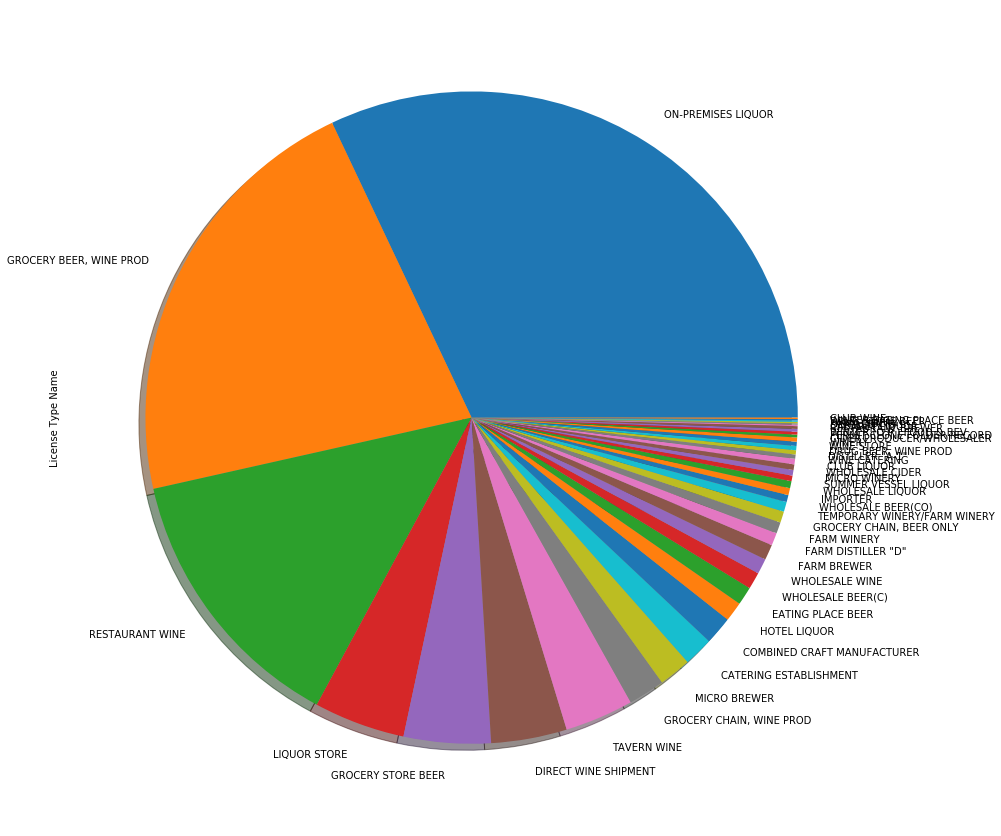

In [37]:
data["License Type Name"].value_counts().plot.pie(shadow=True,figsize=[15,15])  

#bu sekildede istedigimiz plot seklinde grafigi gorebiliriz

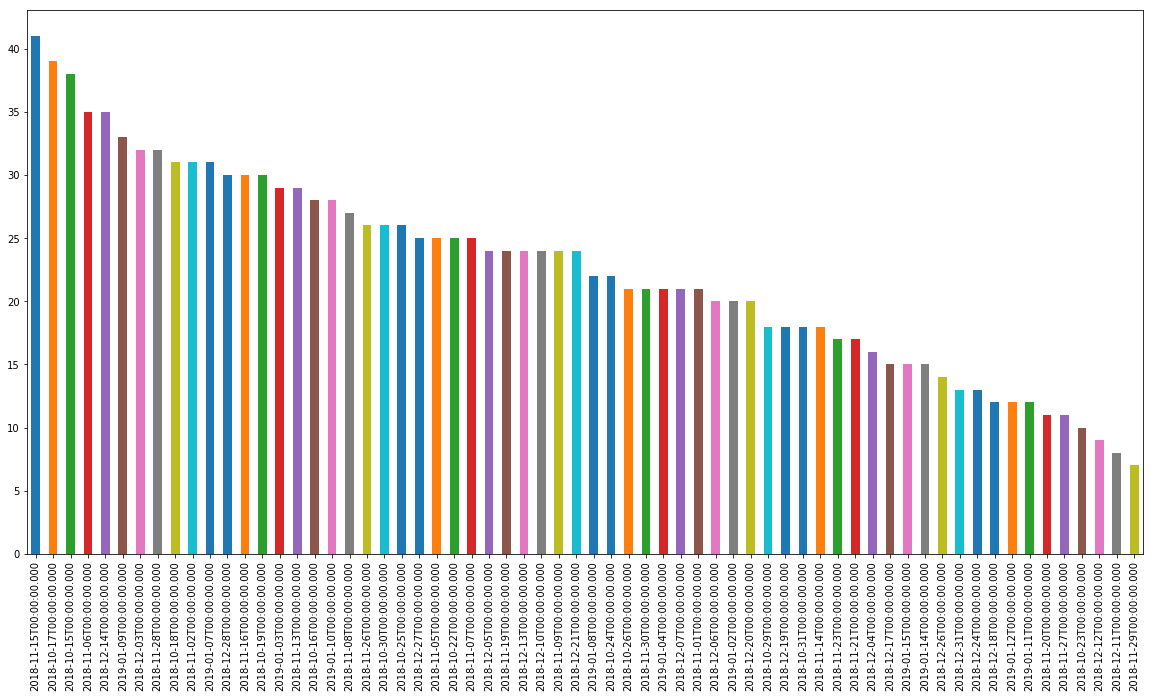

In [38]:
data['License Received Date'].value_counts().plot.bar(figsize=[20,10])

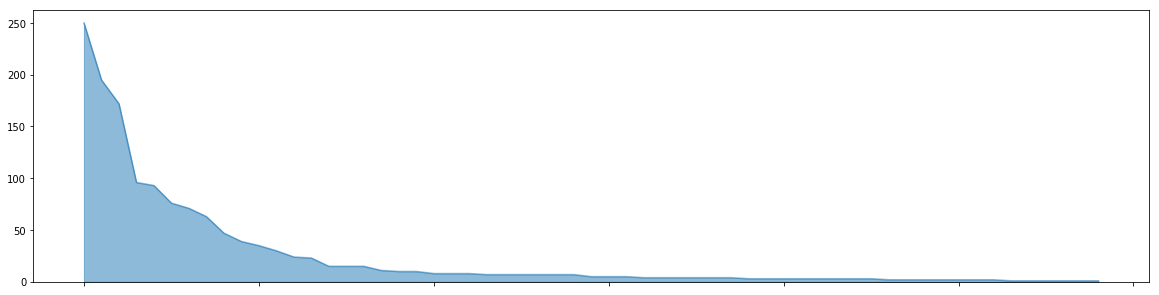

In [39]:
data["County Name (Licensee)"].value_counts().plot.area(figsize=[20,5],stacked=False)

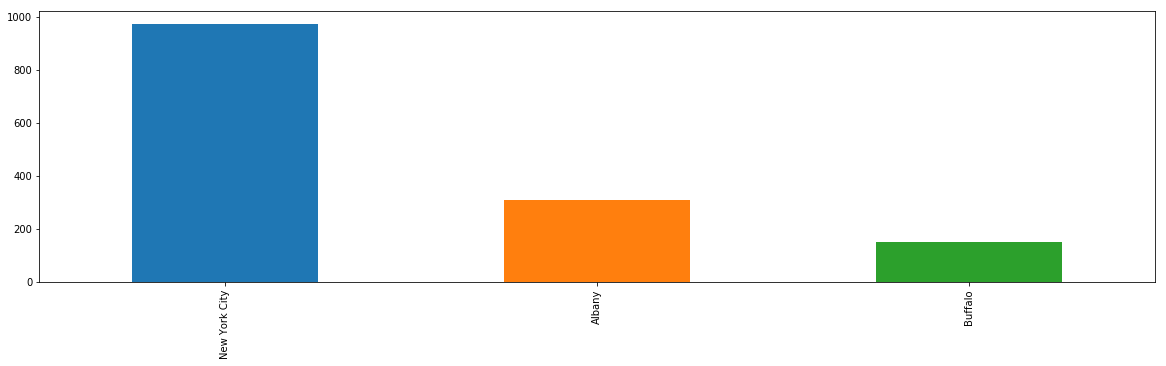

In [40]:
data['Agency Zone Office Name'].value_counts().plot.bar(figsize=[20,5])
#Bagli oldugu bölgelerin dagiliminin bar plotunda gösterimi

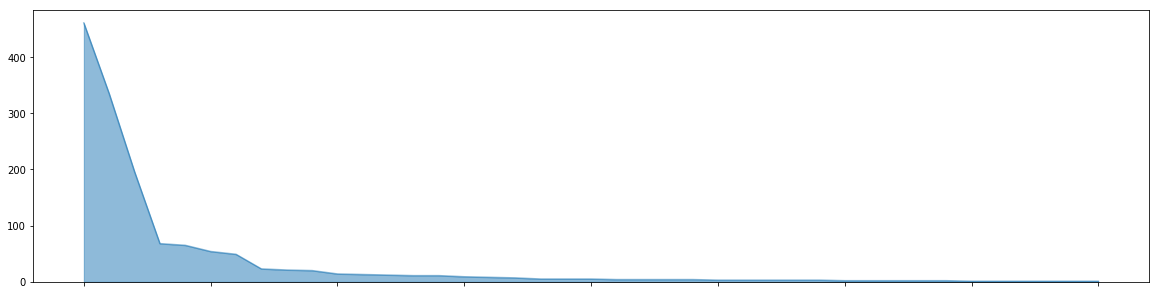

In [41]:
data["License Type Code"].value_counts().plot.area(figsize=[20,5],stacked=False)

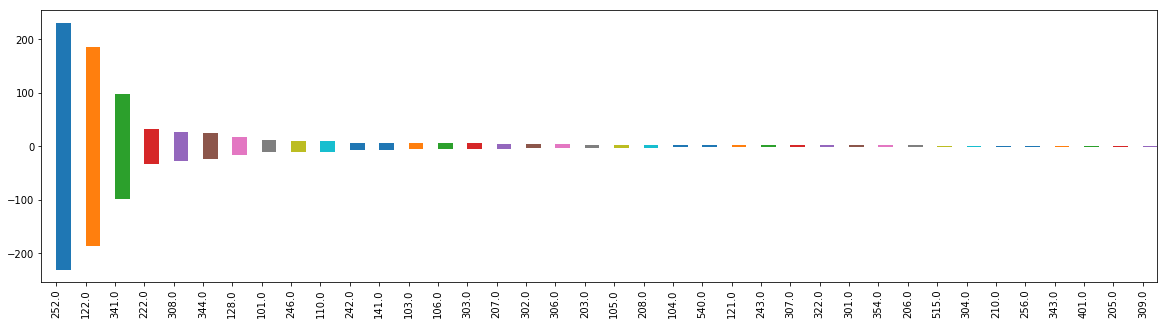

In [42]:
data["License Class Code"].value_counts().plot.bar(figsize=[20,5],orientation='horizontal')

<h3><u>Nümerizasyon</u></h3>

<p> Şimdi verimizi nümerik hale getirelim </p>

In [43]:
# data.info() fonksiyonumuzu cagirip hangi sütunlarımızın hangi veritiplerine sahip oldugunu gorelim
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 16 columns):
License Serial Number                        1439 non-null int64
License Type Name                            1439 non-null object
License Class Code                           1439 non-null float64
License Type Code                            1439 non-null object
Agency Zone Office Number                    1439 non-null int64
Agency Zone Office Name                      1439 non-null object
County Name (Licensee)                       1439 non-null object
Premises Name                                1439 non-null object
Doing Business As (DBA)                      1439 non-null object
Actual Address of Premises (Address1)        1439 non-null object
Additional Address Information (Address2)    1439 non-null object
City                                         1439 non-null object
State                                        1439 non-null object
ZIP                                 

<p>Görüldüğü üzere sütunlarımızın büyük bir kısmı object(string) tipinde.
Halihazırda integer ve float olan ['License Serial Number','License Class Code','Agency Zone Office Number','ZIP'] sütunlarına dokunmuyoruz ve Object olan 12 sütunu nümerik hale getiriyoruz</p>

In [44]:
data = data.astype({
    'License Type Name':'category','License Type Code':'category',
    'Agency Zone Office Name':'category','County Name (Licensee)':'category',
    'Premises Name':'category','Doing Business As (DBA)':'category',
    'Actual Address of Premises (Address1)':'category','Additional Address Information (Address2)':'category',
    'City':'category','State':'category','License Certificate Number':'category','License Received Date':'category'
})
#stringden direkt olarak integer dönüşümü yapamayacağımız için önce category nesnesine dönüstürüyoruz

cat_columns=data.select_dtypes(['category']).columns
data[cat_columns]=data[cat_columns].apply(lambda x: x.cat.codes)

In [45]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 16 columns):
License Serial Number                        1439 non-null int64
License Type Name                            1439 non-null int8
License Class Code                           1439 non-null float64
License Type Code                            1439 non-null int8
Agency Zone Office Number                    1439 non-null int64
Agency Zone Office Name                      1439 non-null int8
County Name (Licensee)                       1439 non-null int8
Premises Name                                1439 non-null int16
Doing Business As (DBA)                      1439 non-null int16
Actual Address of Premises (Address1)        1439 non-null int16
Additional Address Information (Address2)    1439 non-null int16
City                                         1439 non-null int16
State                                        1439 non-null int8
ZIP                                          1439 n

In [46]:
data.sample(10)

,License Serial Number,License Type Name,License Class Code,License Type Code,Agency Zone Office Number,Agency Zone Office Name,County Name (Licensee),Premises Name,Doing Business As (DBA),Actual Address of Premises (Address1),Additional Address Information (Address2),City,State,ZIP,License Certificate Number,License Received Date
885,1315566,11,141.0,19,1,2,21,809,594,210,237,42,3,11207,164,57
710,1315220,19,122.0,0,1,2,2,87,274,1015,237,41,3,10473,164,42
459,1314724,16,122.0,2,1,2,21,621,260,300,101,42,3,11221,164,23
928,1315642,16,122.0,2,1,2,37,25,95,102,237,77,3,11368,164,59
293,1314414,16,122.0,2,1,2,26,435,211,1080,237,153,3,11801,161,15
1350,3161992,5,110.0,8,3,1,31,975,350,435,142,49,3,14424,164,27
651,1315104,30,344.0,34,1,2,27,243,558,495,237,259,3,10035,164,38
62,1313974,32,103.0,4,1,2,39,1178,739,1296,237,365,3,10314,59,1
769,1315341,22,222.0,25,1,2,56,71,758,1226,237,425,3,10703,164,48
60,1313969,25,252.0,30,1,2,56,201,96,15,237,299,3,10573,78,1


<center><h3>Sözlük</h3> </center>

<table>
  <tr>
    <th><u>Etiket</u></th>
    <th><u>Veri Tipi</u></th>
    <th><u>Açıklama</u></th>
  </tr>
  <tr>
    <td>License Serial Number</td>
    <td>text</td>
    <td>Benzersiz Ruhsat Seri Kodu</td>
  </tr>
  <tr>
    <td>License Class Description</td>
    <td>text</td>
    <td>Ruhsat Sınıfı</td>
  </tr>
  <tr>
    <td>License Class  Code</td>
    <td>text</td>
    <td>Sayısal Sınıf Kodu</td>
  </tr>
  <tr>
    <td>License Type Code</td>
    <td>text</td>
    <td>Sayısal Tip Kodu</td>
  </tr>
  <tr>
    <td>Agency Zone Office Number</td>
    <td>text</td>
    <td>Sayısal Acenta Kodu</td>
  </tr>
  <tr>
    <td>County Name</td>
    <td>text</td>
    <td>Ruhsatın İlçesi</td>
  </tr>
      <tr>
    <td>Premises Name</td>
    <td>text</td>
    <td>Tesisin Adı</td>
  </tr>
      <tr>
    <td>Doing Business As (DBA)</td>
    <td>text</td>
    <td>İş Yaptığı İsim</td>
  </tr>
      <tr>
    <td>Actual Address of Premises (Address1)</td>
    <td>text</td>
    <td>Ruhsat Adresi</td>
  </tr>
      <tr>
    <td>Additional Address Information (Address2)</td>
    <td>text</td>
    <td>Adres hakkında ekstra bilgi</td>
  </tr>
      <tr>
    <td>Agency Zone Office Name</td>
    <td>text</td>
    <td>Ruhsat Sahibi acenta</td>
  </tr>
      <tr>
    <td>City</td>
    <td>text</td>
    <td>Ruhsat Sahibinin Şehri</td>
  </tr>
      <tr>
    <td>State</td>
    <td>text</td>
    <td>Ruhsat Sahibinin Eyaleti</td>
  </tr>
          <tr>
    <td>Zip</td>
    <td>text</td>
    <td>Ruhsat Sahibinin Posta Kodu</td>
  </tr>
              <tr>
    <td>License Certificate Number</td>
    <td>text</td>
    <td>Benzersiz Sertifika Numarası</td>
  </tr>
                  <tr>
    <td>License Received Date</td>
    <td>text</td>
    <td>Ruhsatın Alınma Tarihi</td>
  </tr>
</table>